# Neuraminidase head tilt

In [1]:
from __future__ import print_function
import pyemma
pyemma.__version__
import os
%pylab inline
matplotlib.rcParams.update({'font.size': 12})
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 15),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'font.weight':'medium', 
         'xtick.major.size':8,
         'ytick.major.size':8}
pylab.rcParams.update(params)
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as pplt
import numpy as np
import pickle 
import mdtraj as md
import itertools

Populating the interactive namespace from numpy and matplotlib


## Load Coordinates

In [2]:
#2009 glycosylated NA
indir2 = '/net/gpfs-amarolab/lcasalino/FLU_MSM/pdm2009_H1N1/NA_trajectories/NA_tetramers_stalk_alignment'
top1 = indir2+'/NA.tetramer.pdm.psf'
from glob import glob
trajs2 = glob ('/net/gpfs-amarolab/lcasalino/FLU_MSM/pdm2009_H1N1/NA_trajectories/NA_tetramers_stalk_alignment/NA*.dcd')

#2015 glycosylated NA
indir3 = '/net/gpfs-amarolab/lcasalino/FLU_MSM/michigan2015_H1N1/NA_trajectories/NA_tetramers_stalk_alignment'
top2 = indir3+'/NA.tetramer.michi.psf'
from glob import glob
trajs3 = glob ('/net/gpfs-amarolab/lcasalino/FLU_MSM/michigan2015_H1N1/NA_trajectories/NA_tetramers_stalk_alignment/NA*.dcd')

## Select Features and create input data types

#### Head tilt angle
We only need to create the features once, since we are using identical features across all trajectories. Note: VMD's residue selection is equivalent to pyemma/mdtraj's resid selection. First let's create the features that we need.

In [3]:
#feature to find the shortest distance between COM of head and COM of center of stalk
def feature_1(traj: md.Trajectory):
    full1 = np.array([0], dtype=float32) #default is int64 which causes problems when loading coordinates
    full2 = np.array([0], dtype=float32)
    full3 = np.array([0], dtype=float32)
    full4 = np.array([0], dtype=float32)
    full5 = np.array([0], dtype=float32)
    centers1 = COM1_H1.transform(traj)  # yields ndarray
    centers2 = COM2_H2.transform(traj)
    centers3 = COM3_H3.transform(traj)
    centers4 = COM4_H4.transform(traj)
    centers5 = COM1_Stalk.transform(traj)  # yields ndarray
    for i, j in zip(centers1, centers5):
        com1 = np.linalg.norm(np.subtract(i,j))
        full1 = np.append(full1, com1)
    reshaped1 = np.reshape(full1, (-1, 1))
    reshaped1 = reshaped1[1:]
    reshaped1 = reshaped1.astype('float32')
    for i, j in zip(centers2, centers5):
        com2 = np.linalg.norm(np.subtract(i,j))
        full2 = np.append(full2, com2)
    reshaped2 = np.reshape(full2, (-1, 1))
    reshaped2 = reshaped2[1:]
    reshaped2 = reshaped2.astype('float32')
    for i, j in zip(centers3, centers5):
        com3 = np.linalg.norm(np.subtract(i,j))
        full3 = np.append(full3, com3)
    reshaped3 = np.reshape(full3, (-1, 1))
    reshaped3 = reshaped3[1:]
    reshaped3 = reshaped3.astype('float32')
    for i, j in zip(centers4, centers5):
        com4 = np.linalg.norm(np.subtract(i,j))
        full4 = np.append(full4, com4)
    reshaped4 = np.reshape(full4, (-1, 1))
    reshaped4 = reshaped4[1:]
    reshaped4 = reshaped4.astype('float32')
    minimum1 = np.hstack((reshaped1, reshaped2, reshaped3, reshaped4))
    minimum2 = np.amin(minimum1, axis=1)
    minimum3 = np.asarray(minimum2)
    minimum4 = np.reshape(minimum3, (-1, 1))
    minimum4 = minimum4.astype('float32')
    return minimum4

#feature to find the shortest distance between COM of head and COM of bottom of stalk
def feature_2(traj: md.Trajectory):
    full1 = np.array([0], dtype=float32) #default is int64 which causes problems when loading coordinates
    full2 = np.array([0], dtype=float32)
    full3 = np.array([0], dtype=float32)
    full4 = np.array([0], dtype=float32)
    full5 = np.array([0], dtype=float32)
    centers1 = COM1_H1.transform(traj)  # yields ndarray
    centers2 = COM2_H2.transform(traj)
    centers3 = COM3_H3.transform(traj)
    centers4 = COM4_H4.transform(traj)
    centers5 = COM2_Stalk.transform(traj)  # yields ndarray
    for i, j in zip(centers1, centers5):
        com1 = np.linalg.norm(np.subtract(i,j))
        full1 = np.append(full1, com1)
    reshaped1 = np.reshape(full1, (-1, 1))
    reshaped1 = reshaped1[1:]
    reshaped1 = reshaped1.astype('float32')
    for i, j in zip(centers2, centers5):
        com2 = np.linalg.norm(np.subtract(i,j))
        full2 = np.append(full2, com2)
    reshaped2 = np.reshape(full2, (-1, 1))
    reshaped2 = reshaped2[1:]
    reshaped2 = reshaped2.astype('float32')
    for i, j in zip(centers3, centers5):
        com3 = np.linalg.norm(np.subtract(i,j))
        full3 = np.append(full3, com3)
    reshaped3 = np.reshape(full3, (-1, 1))
    reshaped3 = reshaped3[1:]
    reshaped3 = reshaped3.astype('float32')
    for i, j in zip(centers4, centers5):
        com4 = np.linalg.norm(np.subtract(i,j))
        full4 = np.append(full4, com4)
    reshaped4 = np.reshape(full4, (-1, 1))
    reshaped4 = reshaped4[1:]
    reshaped4 = reshaped4.astype('float32')
    minimum1 = np.hstack((reshaped1, reshaped2, reshaped3, reshaped4))
    minimum2 = np.mean(minimum1, axis=1)
    minimum3 = np.asarray(minimum2)
    minimum4 = np.reshape(minimum3, (-1, 1))
    minimum4 = minimum4.astype('float32')
    return minimum4

In [4]:
#function courtesy Moritz Hoffman at pyemma - thanks Moritz!
feat_tilt_2009g = pyemma.coordinates.featurizer(top1)

from pyemma.coordinates.data.featurization.misc import GroupCOMFeature

COM1_h1 = feat_tilt_2009g.topology.select('resid 75 to 460 and name CA')
COM2_h2 = feat_tilt_2009g.topology.select('resid 550 to 930 and name CA')
COM3_h3 = feat_tilt_2009g.topology.select('resid 1020 to 1400 and name CA')
COM4_h4 = feat_tilt_2009g.topology.select('resid 1470 to 1870 and name CA')
COM_Stalk1 = feat_tilt_2009g.topology.select('resid 5 474 943 1412 and name CA')
COM_Stalk2 = feat_tilt_2009g.topology.select('resid 511 980 1448 44 and name CA')

COM1_H1 = GroupCOMFeature(feat_tilt_2009g.topology, [COM1_h1])
COM2_H2 = GroupCOMFeature(feat_tilt_2009g.topology, [COM2_h2])
COM3_H3 = GroupCOMFeature(feat_tilt_2009g.topology, [COM3_h3])
COM4_H4 = GroupCOMFeature(feat_tilt_2009g.topology, [COM4_h4])
COM1_Stalk = GroupCOMFeature(feat_tilt_2009g.topology, [COM_Stalk1])
COM2_Stalk = GroupCOMFeature(feat_tilt_2009g.topology, [COM_Stalk2])

#this verifies that VMD's residue selection = pyemma's resid
#test = feat_tilt_2009g.topology.select('resid 90 and name CA')
#print(test) #should equal ~index 683, to match with VMD's residue 90/resid 596

feat_tilt_2009g.add_custom_func(feature_1, dim=1, description='tilt')
feat_tilt_2009g.add_custom_func(feature_2, dim=1, description='tilt')
print(feat_tilt_2009g.dimension())
print(feat_tilt_2009g.describe())

2
['tilt', 'tilt']


In [5]:
#function courtesy Moritz Hoffman at pyemma - thanks Moritz!
feat_tilt_2015g = pyemma.coordinates.featurizer(top2)

COM1_h1 = feat_tilt_2015g.topology.select('resid 75 to 460 and name CA')
COM2_h2 = feat_tilt_2015g.topology.select('resid 550 to 930 and name CA')
COM3_h3 = feat_tilt_2015g.topology.select('resid 1020 to 1400 and name CA')
COM4_h4 = feat_tilt_2015g.topology.select('resid 1470 to 1870 and name CA')
COM_Stalk1 = feat_tilt_2015g.topology.select('resid 5 474 943 1412 and name CA')
COM_Stalk2 = feat_tilt_2015g.topology.select('resid 511 980 1448 44 and name CA')

COM1_H1 = GroupCOMFeature(feat_tilt_2015g.topology, [COM1_h1])
COM2_H2 = GroupCOMFeature(feat_tilt_2015g.topology, [COM2_h2])
COM3_H3 = GroupCOMFeature(feat_tilt_2015g.topology, [COM3_h3])
COM4_H4 = GroupCOMFeature(feat_tilt_2015g.topology, [COM4_h4])
COM1_Stalk = GroupCOMFeature(feat_tilt_2015g.topology, [COM_Stalk1])
COM2_Stalk = GroupCOMFeature(feat_tilt_2015g.topology, [COM_Stalk2])

feat_tilt_2015g.add_custom_func(feature_1, dim=1, description='tilt')
feat_tilt_2015g.add_custom_func(feature_2, dim=1, description='tilt')
print(feat_tilt_2015g.dimension())
print(feat_tilt_2015g.describe())

2
['tilt', 'tilt']


Now, let's load the coordinates of each dataset as a function of the features we selected above into the memory (this takes maybe 20 minutes). We will also print some info about the data we loaded to make sure we are loading the correct trajectories. The shape of the first element should show the number of frames it has and the number of features we selected.

In [6]:
#lag time here doesn't really matter
print("2009 glycosylated HA")
data_2009_glycosylated = pyemma.coordinates.load(trajs2, features=feat_tilt_2009g)
print('trajectory time step = .06 ns')
print("data_2009_glycosylated has",len(data_2009_glycosylated), "trajectories")
print("data_2009_glycosylated has",(data_2009_glycosylated[0].shape[0]), "frames in the first trajectory")
print("data_2009_glycosylated has",(data_2009_glycosylated[0].shape[1]), "features")

print("2015 glycosylated HA")
data_2015_glycosylated = pyemma.coordinates.load(trajs3, features=feat_tilt_2015g)
print('trajectory time step = .06 ns')
print("data_2015_glycosylated has",len(data_2015_glycosylated), "trajectories")
print("data_2015_glycosylated has",(data_2015_glycosylated[0].shape[0]), "frames in the first trajectory")
print("data_2015_glycosylated has",(data_2015_glycosylated[0].shape[1]), "features")

2009 glycosylated HA


trajectory time step = .06 ns
data_2009_glycosylated has 30 trajectories
data_2009_glycosylated has 7363 frames in the first trajectory
data_2009_glycosylated has 2 features
2015 glycosylated HA


trajectory time step = .06 ns
data_2015_glycosylated has 30 trajectories
data_2015_glycosylated has 7083 frames in the first trajectory
data_2015_glycosylated has 2 features


Let's save the data types created so we can load them later (and then load them for use)

In [7]:
with open('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/data_2009_glycosylated.txt', 'wb') as fp:
    pickle.dump(data_2009_glycosylated, fp)
with open('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/data_2009_glycosylated.txt', 'rb') as fp:
    data_2009_glycosylated = pickle.load(fp)
    
with open('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/data_2015_glycosylated.txt', 'wb') as fp:
    pickle.dump(data_2015_glycosylated, fp)
with open('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/data_2015_glycosylated.txt', 'rb') as fp:
    data_2015_glycosylated = pickle.load(fp)

## Reducing the feature dimension using TICA

Let's create the TICA object from our original data. Note, this TICA lag time must be shorter than or equal to the MSM lag time. Additionally, our simulations must be longer than 500 steps for this MSM to be valid, which they are. If the lag time (time step) was longer than the simulation time, that would mean we could not resolve any motions at all. The timestep conversion used for in making these trajectories is 0.06 ns. Thus we have 500 * 0.06 = 40 ns; these trajectories are ~450 ns so they pass the test.

In [8]:
print("2009 glycosylated dataset")
tica_obj_2009g = coor.tica(data_2009_glycosylated, lag=100, kinetic_map=False, var_cutoff=0.95, reversible=True) #lag time in steps (.02ns/step)
print(tica_obj_2009g.describe())
print("2015 glycosylated dataset")
tica_obj_2015g = coor.tica(data_2015_glycosylated, lag=100, kinetic_map=False, var_cutoff=0.95, reversible=True) #lag time in steps (.02ns/step)
print(tica_obj_2015g.describe())

2009 glycosylated dataset


[TICA, lag = 100; max. output dim. = 2]
2015 glycosylated dataset


[TICA, lag = 100; max. output dim. = 2]


These functions will (1) map the input data of the transformer and return it as a list of arrays, and (2) concatenate that list into a numpy array

In [9]:
tica_output_2009g = tica_obj_2009g.get_output()
tica_concatenated_2009g = np.concatenate(tica_output_2009g)
tica_output_2015g = tica_obj_2015g.get_output()
tica_concatenated_2015g = np.concatenate(tica_output_2015g)

The concatenated datasets below are a tuple. What is the first list and what is the second list? The first list is the number of frames in the dataset, and the second is the tICs - we show each of these in two ways below for validation.

In [10]:
print("The 2009 unglycosylated dataset has",(tica_obj_2009g.n_frames_total()),"frames")
print("The 2009 unglycosylated dataset has",(tica_concatenated_2009g.shape[0]),"frames")
print("The 2009 unglycosylated dataset has",(tica_obj_2009g.dimension()),"dimensions")
print("The 2009 unglycosylated dataset has",(tica_concatenated_2009g.shape[1]),"dimensions")

The 2009 unglycosylated dataset has 220890 frames
The 2009 unglycosylated dataset has 220890 frames
The 2009 unglycosylated dataset has 2 dimensions
The 2009 unglycosylated dataset has 2 dimensions


Now we can describe the tuple that is our concatenated output datasets, remembering that TICA dimensions are the TICA internal coordinates.

In [11]:
print("The 2009 glycosylated dataset has",(tica_concatenated_2009g.shape[0]),"frames and",(tica_concatenated_2009g.shape[1]),"tICs")
print("The 2015 glycosylated dataset has",(tica_concatenated_2015g.shape[0]),"frames and",(tica_concatenated_2015g.shape[1]),"tICs")

The 2009 glycosylated dataset has 220890 frames and 2 tICs
The 2015 glycosylated dataset has 212490 frames and 2 tICs


With the TICA coordinates selected above, we want to see if there's a noticeable jump between states. Here, we are qualitatively looking to see the line jump up and down and hopefully find some plateaus, which equate to metastable states. We do not want to see a flat line right down the middle. We will look at all 30 NA simulations in our datasets.

The first 30 trajectories of the 2009 glycosylated dataset contain 220890 frames
The first 30 trajectories of the 2015 glycosylated dataset contain 212490 frames


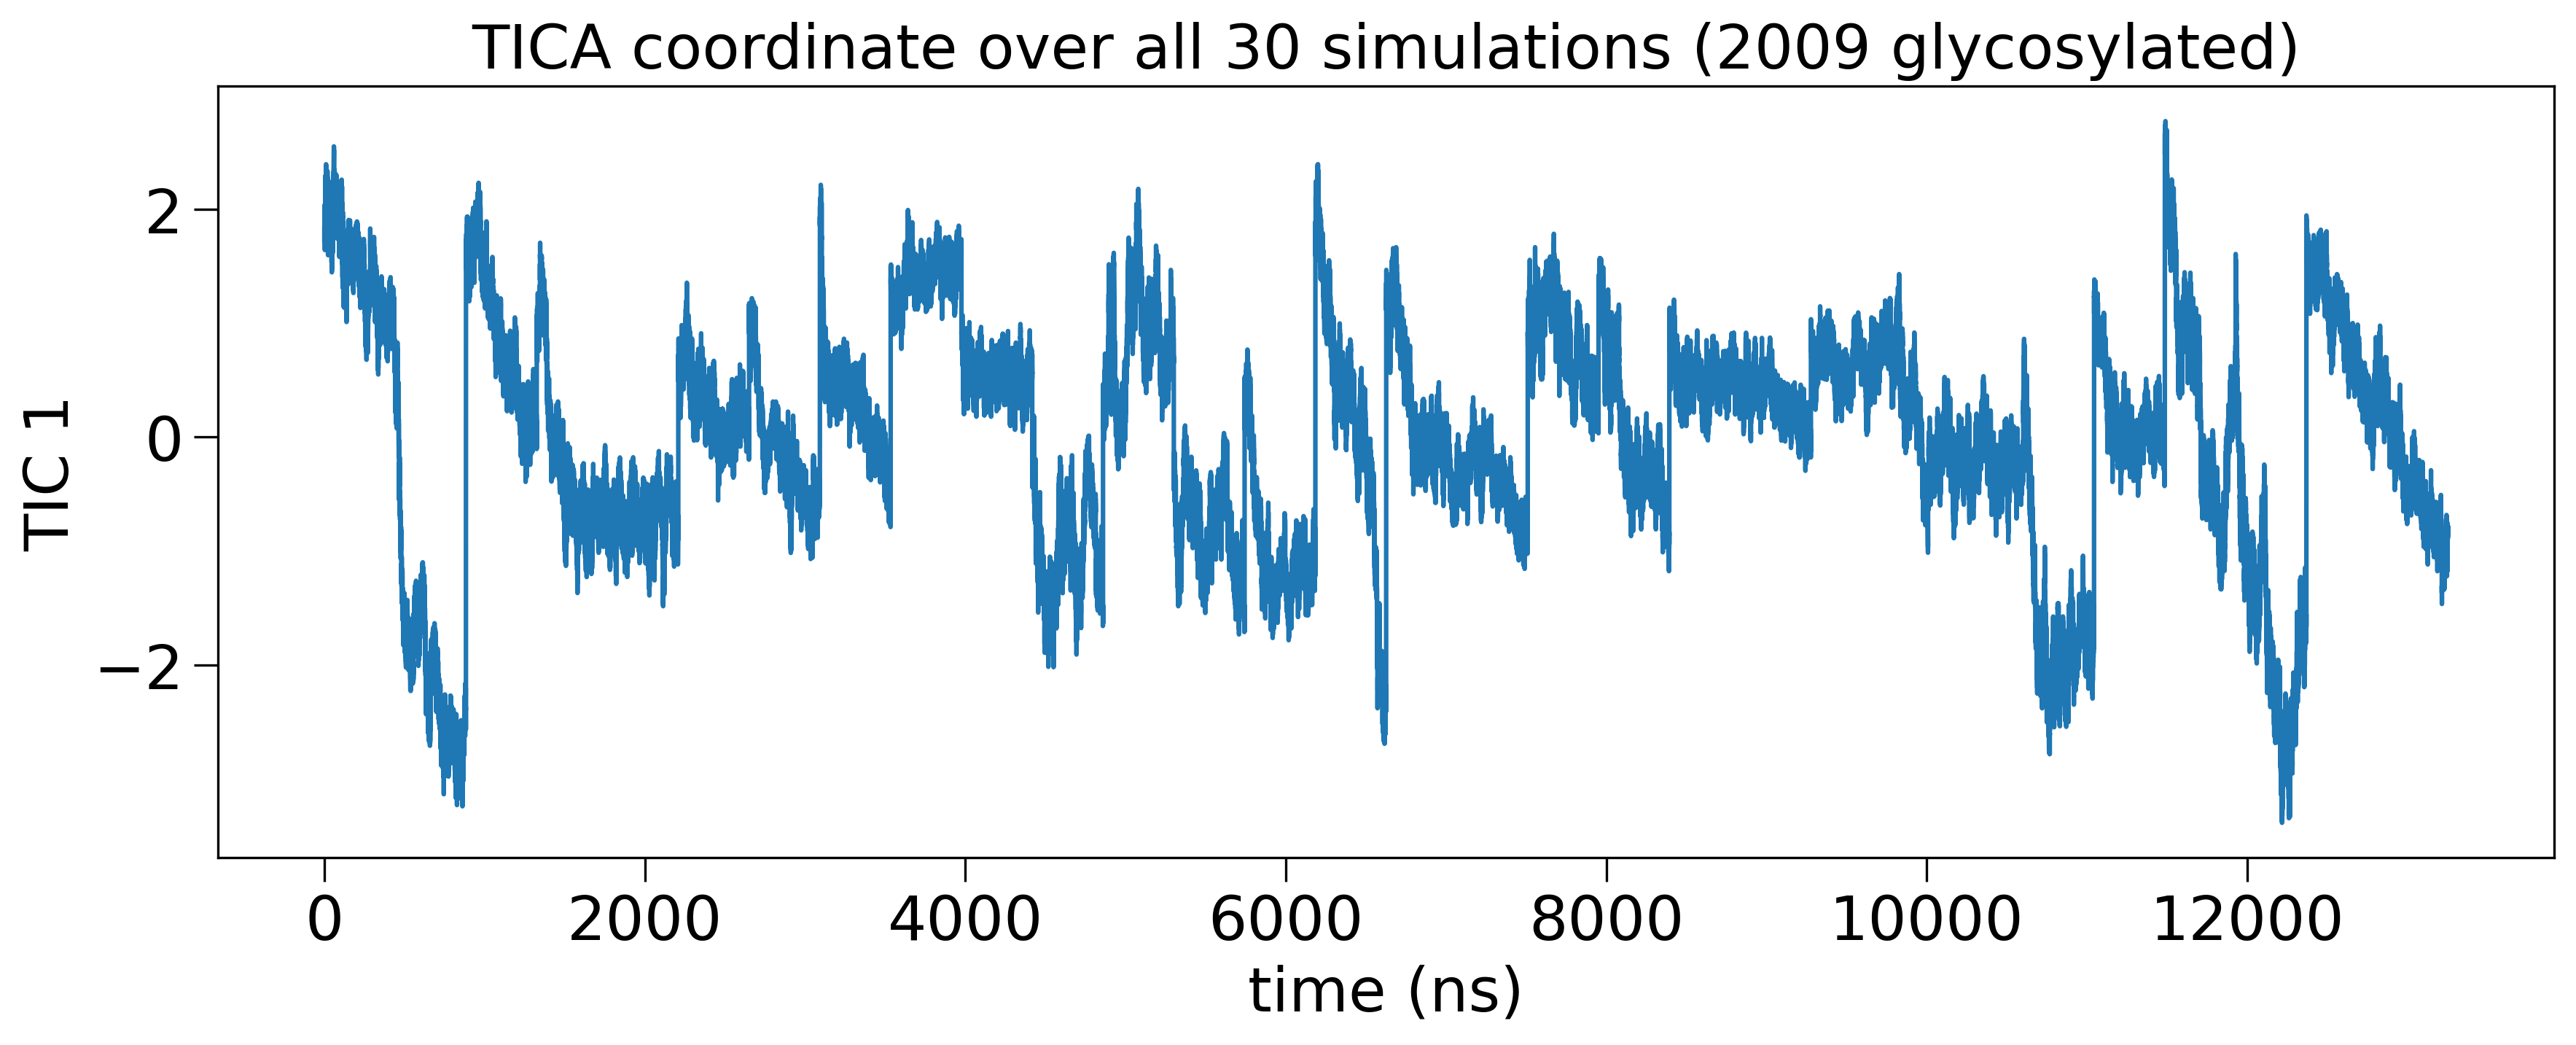

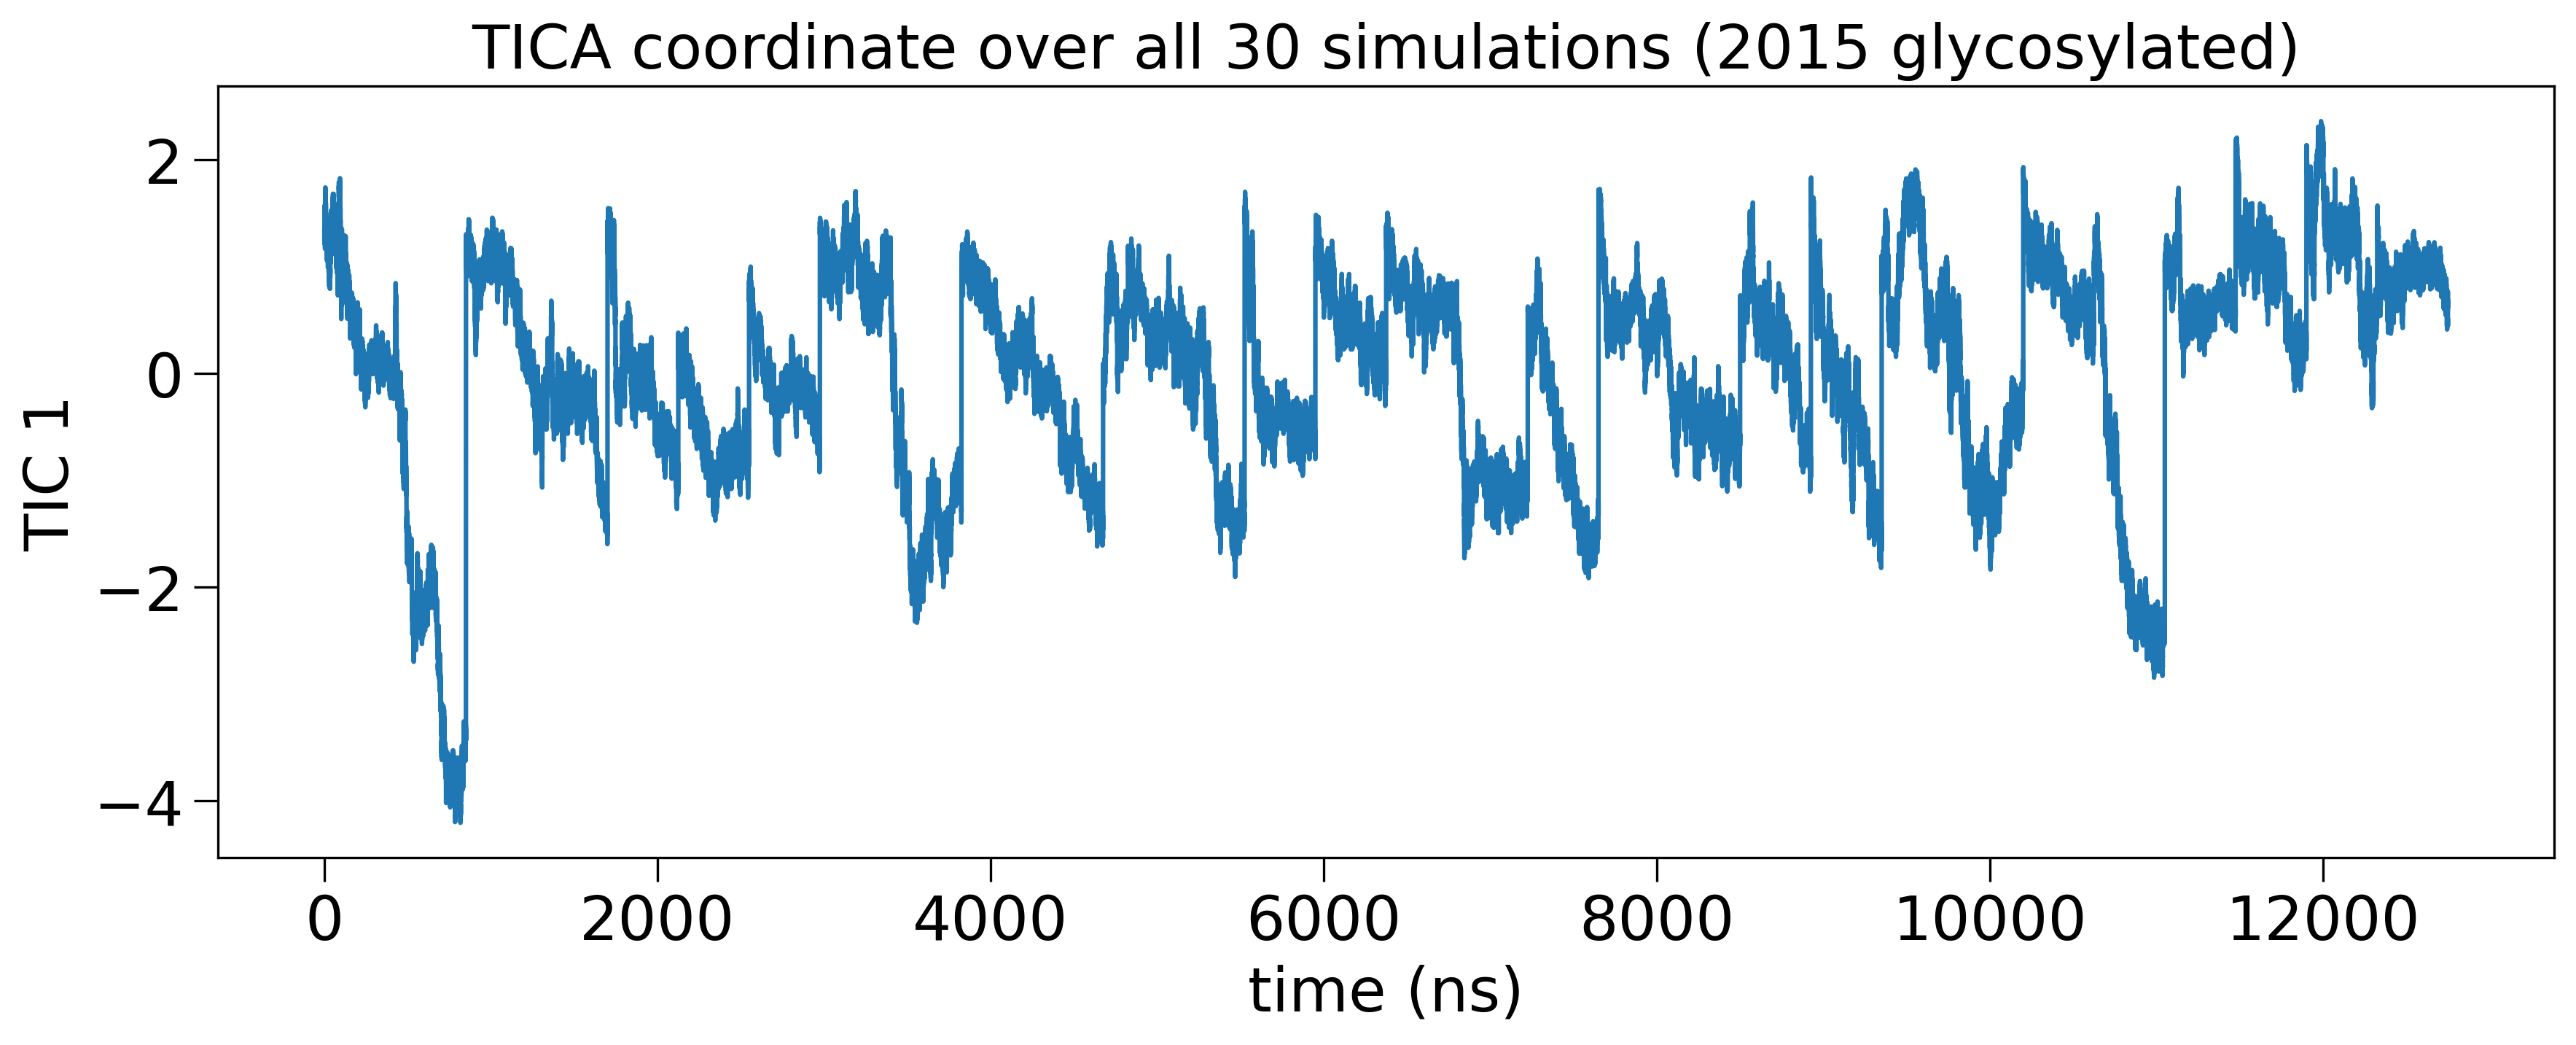

In [12]:
#2009 glycosylated
all_30_sims_2009g = np.concatenate(tica_output_2009g, axis=0)
plt.figure(figsize=(12,5), dpi=300)
matplotlib.rcParams.update({'font.size': 14})
dt = 0.06
x = dt*np.arange(all_30_sims_2009g.shape[0])
plt.title('TICA coordinate over all 30 simulations (2009 glycosylated)')
plot(x, all_30_sims_2009g[:,0]); ylabel('TIC 1'); xlabel('time (ns)')
plt.tight_layout()
plt.savefig('//net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/figures/tica_2009g.png',dpi=300)
print("The first 30 trajectories of the 2009 glycosylated dataset contain",all_30_sims_2009g.shape[0],"frames")

#2015 glycosylated
all_30_sims_2015g = np.concatenate(tica_output_2015g, axis=0)
plt.figure(figsize=(12,5), dpi=300)
matplotlib.rcParams.update({'font.size': 14})
dt = 0.06
x = dt*np.arange(all_30_sims_2015g.shape[0])
plt.title('TICA coordinate over all 30 simulations (2015 glycosylated)')
plot(x, all_30_sims_2015g[:,0]); ylabel('TIC 1'); xlabel('time (ns)')
plt.tight_layout()
plt.savefig('//net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/figures/tica_2015g.png',dpi=300)
print("The first 30 trajectories of the 2015 glycosylated dataset contain",all_30_sims_2015g.shape[0],"frames")

We see similar transitions and plateaus between the two datasets, suggesting that the transitions we will find will be similar. This is a good sign.

Now let's save and reload the data

In [13]:
with open('//net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/tica_output_2009g.txt', 'wb') as fp:
    pickle.dump(tica_output_2009g, fp)
with open('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/tica_concatenated_2009g.txt', 'wb') as fp:
    pickle.dump(tica_concatenated_2009g, fp) 
with open('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/tica_output_2015g.txt', 'wb') as fp:
    pickle.dump(tica_output_2015g, fp)
with open('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/tica_concatenated_2015g.txt', 'wb') as fp:
    pickle.dump(tica_concatenated_2015g, fp) 
    
with open ('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/tica_output_2009g.txt', 'rb') as fp:
    tica_output_2009g = pickle.load(fp) 
with open ('//net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/tica_concatenated_2009g.txt', 'rb') as fp:
    tica_concatenated_2009g = pickle.load(fp) 
with open ('//net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/tica_output_2015g.txt', 'rb') as fp:
    tica_output_2015g = pickle.load(fp) 
with open ('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/tica_concatenated_2015g.txt', 'rb') as fp:
    tica_concatenated_2015g = pickle.load(fp) 

## Clustering

The next step is to use this reduced-dimensions data to cluster our data, and create the discrete trajectories (dtrajs) as a function of the k-means cluster centers. You can see how the data is spread over the energy landscape in the graph below, where we are plotting the free energy landscape with the cluster centers (in black); this can take maybe 15 minutes to run. We select 300 clusters (k=300) and 32 processors to run (n_jobs=32)

In [14]:
#2009 glycosylated
clk_2009g = coor.cluster_kmeans(tica_output_2009g, k=300, max_iter=70, n_jobs=32, fixed_seed=True)
dtrajs_2009g = clk_2009g.dtrajs

#2015 glycosylated
clk_2015g = coor.cluster_kmeans(tica_output_2015g, k=300, max_iter=70, n_jobs=32, fixed_seed=True)
dtrajs_2015g = clk_2015g.dtrajs

01-10-22 17:31:25 pyemma.coordinates.clustering.kmeans.KmeansClustering[10] WARNING  Algorithm did not reach convergence criterion of 1e-05 in 70 iterations. Consider increasing max_iter.


With the discrete trajectories created, let's save and then load them:

In [15]:
with open('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/clk_2009g.txt', 'wb') as fp:
    pickle.dump(clk_2009g, fp)
with open('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/dtrajs_2009g.txt', 'wb') as fp:
    pickle.dump(dtrajs_2009g, fp)
with open('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/clk_2015g.txt', 'wb') as fp:
    pickle.dump(clk_2015g, fp)
with open('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/dtrajs_2015g.txt', 'wb') as fp:
    pickle.dump(dtrajs_2015g, fp)
    
with open ('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/clk_2009g.txt', 'rb') as fp:
    clk_2009g = pickle.load(fp) 
with open ('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/dtrajs_2009g.txt', 'rb') as fp:
    dtrajs_2009g = pickle.load(fp) 
with open ('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/clk_2015g.txt', 'rb') as fp:
    clk_2015g = pickle.load(fp) 
with open ('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/dtrajs_2015g.txt', 'rb') as fp:
    dtrajs_2015g = pickle.load(fp) 

## MSM creation 

With our TICA space created and the trajectories clustered into discrete trajectories, let's starting creating MSMs. First we will try to create a hidden Markov model.

01-10-22 17:32:13 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[14] WARNING  Ignoring lag times that exceed the longest trajectory: [ 8091 10000]


01-10-22 17:32:15 pyemma.msm.estimators.bayesian_hmsm.BayesianHMSM[17] WARNING  Ignored error during estimation: Trying to initialize 5-state HMM from smaller 3-state MSM.
01-10-22 17:32:16 pyemma.msm.estimators.bayesian_hmsm.BayesianHMSM[17] WARNING  Ignored error during estimation: Given active set has empty states
01-10-22 17:32:16 pyemma.msm.estimators.bayesian_hmsm.BayesianHMSM[17] WARNING  Ignored error during estimation: Given active set has empty states
01-10-22 17:32:16 pyemma.msm.estimators.bayesian_hmsm.BayesianHMSM[17] WARNING  Ignored error during estimation: Trying to initialize 5-state HMM from smaller 2-state MSM.
01-10-22 17:32:30 pyemma.msm.estimators.bayesian_hmsm.BayesianHMSM[17] WARNING  Ignored error during estimation: Input matrix is not weakly connected. Therefore it has no unique stationary distribution. Separate disconnected components and handle them separately
01-10-22 17:32:43 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[14] WARNING  Estimatio

/home/cseitz/miniconda3/envs/pyemma/lib/python3.9/site-packages/msmtools/analysis/dense/decomposition.py:554: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)
/home/cseitz/miniconda3/envs/pyemma/lib/python3.9/site-packages/msmtools/analysis/dense/decomposition.py:564: RuntimeWarning: divide by zero encountered in log
  -1.0 * tau / np.log(np.abs(evals[np.logical_not(ind_abs_one)]))


01-10-22 17:32:43 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[14] WARNING  Some timescales could not be computed. Timescales array is smaller than expected or contains NaNs
01-10-22 17:32:45 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[16] WARNING  Ignoring lag times that exceed the longest trajectory: [ 8091 10000]


01-10-22 17:32:47 pyemma.msm.estimators.bayesian_hmsm.BayesianHMSM[19] WARNING  Ignored error during estimation: Trying to initialize 5-state HMM from smaller 1-state MSM.
01-10-22 17:32:47 pyemma.msm.estimators.bayesian_hmsm.BayesianHMSM[19] WARNING  Ignored error during estimation: Trying to initialize 5-state HMM from smaller 1-state MSM.
01-10-22 17:32:48 pyemma.msm.estimators.bayesian_hmsm.BayesianHMSM[19] WARNING  Ignored error during estimation: Trying to initialize 5-state HMM from smaller 1-state MSM.
01-10-22 17:32:48 pyemma.msm.estimators.bayesian_hmsm.BayesianHMSM[19] WARNING  Ignored error during estimation: Trying to initialize 5-state HMM from smaller 2-state MSM.


/home/cseitz/miniconda3/envs/pyemma/lib/python3.9/site-packages/msmtools/analysis/dense/pcca.py:284: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] /= math.sqrt(np.dot(evecs[:, i] * pi, evecs[:, i]))


01-10-22 17:32:51 pyemma.msm.estimators.bayesian_hmsm.BayesianHMSM[19] WARNING  Ignored error during estimation: Input matrix is not weakly connected. Therefore it has no unique stationary distribution. Separate disconnected components and handle them separately
01-10-22 17:33:27 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[16] WARNING  Estimation has failed at lagtimes: [1065 1598 2397 3596 5394]. Details:
['Error at lag time 1065: Input matrix is not weakly connected. Therefore it '
 'has no unique stationary distribution. Separate disconnected components and '
 'handle them separately',
 'Error at lag time 1598: Trying to initialize 5-state HMM from smaller '
 '2-state MSM.',
 'Error at lag time 2397: Trying to initialize 5-state HMM from smaller '
 '1-state MSM.',
 'Error at lag time 3596: Trying to initialize 5-state HMM from smaller '
 '1-state MSM.',
 'Error at lag time 5394: Trying to initialize 5-state HMM from smaller '
 '1-state MSM.']
01-10-22 17:33:27 pyemma.

/home/cseitz/miniconda3/envs/pyemma/lib/python3.9/site-packages/msmtools/analysis/dense/decomposition.py:554: SpectralWarning: Multiple eigenvalues with magnitude one.
  warnings.warn('Multiple eigenvalues with magnitude one.', SpectralWarning)


01-10-22 17:33:28 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[16] WARNING  Some timescales could not be computed. Timescales array is smaller than expected or contains NaNs


<Figure size 1080x1080 with 0 Axes>

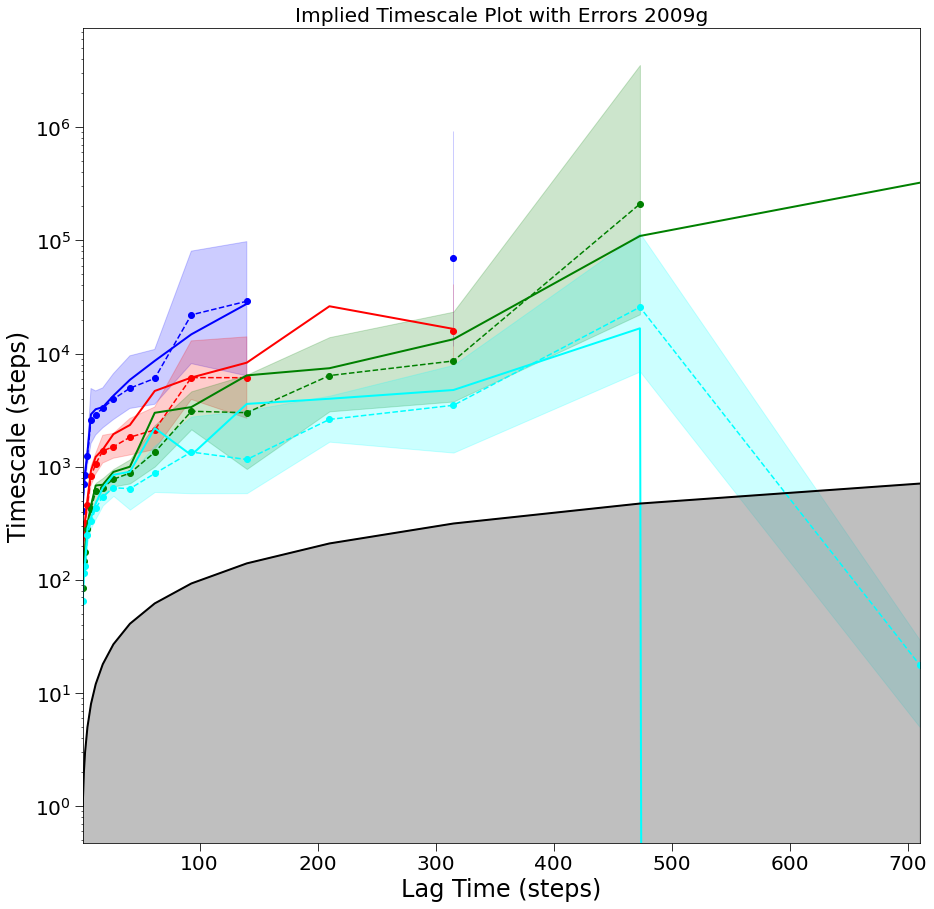

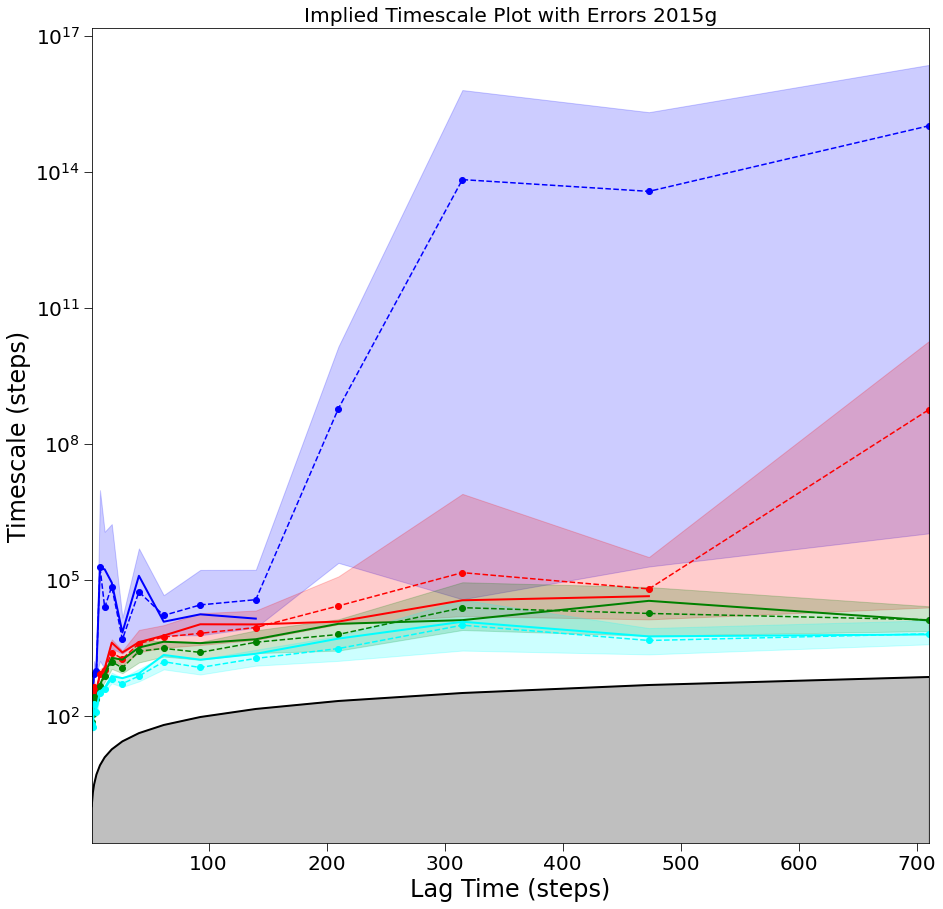

<Figure size 1080x1080 with 0 Axes>

In [16]:
#2009 glycosylated
its = pyemma.msm.timescales_hmsm(dtrajs_2009g, 5, lags=10000, nits=10, n_jobs=32, errors='bayes') #errors='bayes'
pplt.plot_implied_timescales(its, units='steps', nits=10, linewidth=2) #units can be ns if desired
plt.title('Implied Timescale Plot with Errors 2009g')
plt.xlabel('Lag Time (steps)', fontsize=24)
plt.ylabel('Timescale (steps)', fontsize=24)
plt.savefig('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/figures/its_hmm_2009g.png', dpi=300)
plt.figure()

#2015 glycosylated
its = pyemma.msm.timescales_hmsm(dtrajs_2015g, 5, lags=10000, nits=10, n_jobs=32, errors='bayes') #errors='bayes'
pplt.plot_implied_timescales(its, units='steps', nits=10, linewidth=2) #units can be ns if desired
plt.title('Implied Timescale Plot with Errors 2015g')
plt.xlabel('Lag Time (steps)', fontsize=24)
plt.ylabel('Timescale (steps)', fontsize=24)
plt.savefig('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/figures/its_hmm_2015g.png', dpi=300)
plt.figure()

We want to see smooth sloping lines that extend a long ways from this plot. We do not see that here, the plot looks pretty terrible. Thus we cannot create a hidden Markov model. Let's try a normal MSM instead. Here we are selecting 5 macrostates with lag times out to 2500 steps maximum. This took maybe 10 minutes.

<Figure size 1080x1080 with 0 Axes>

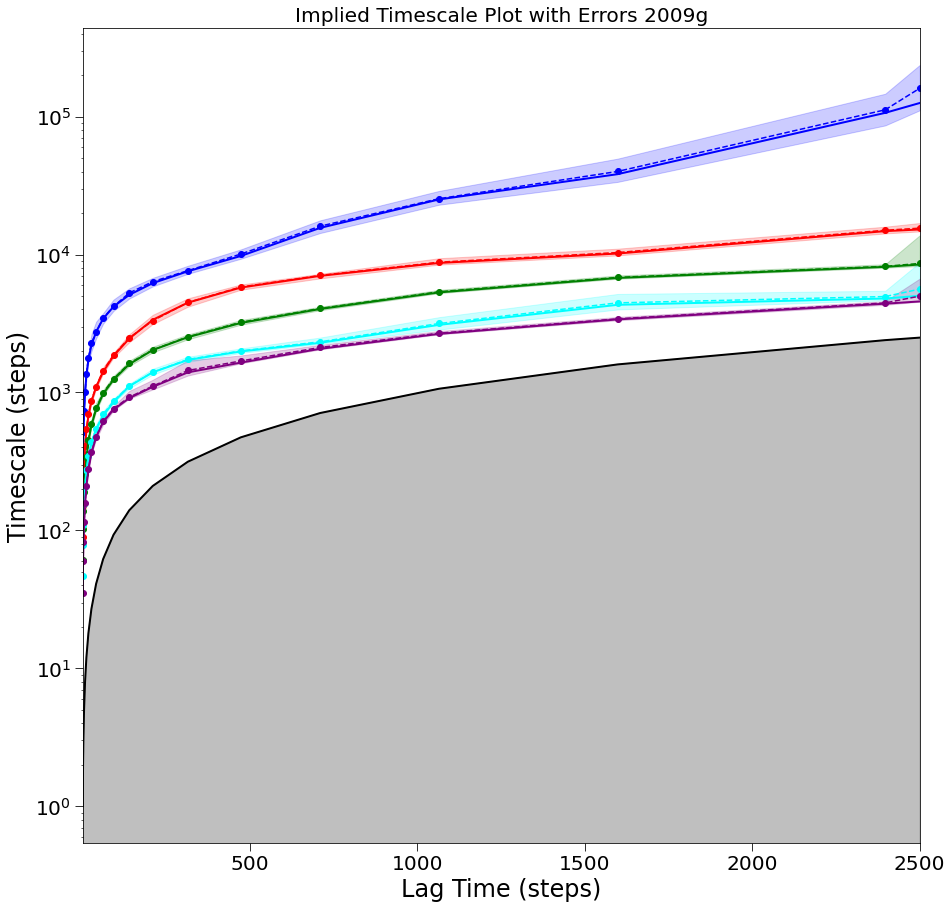

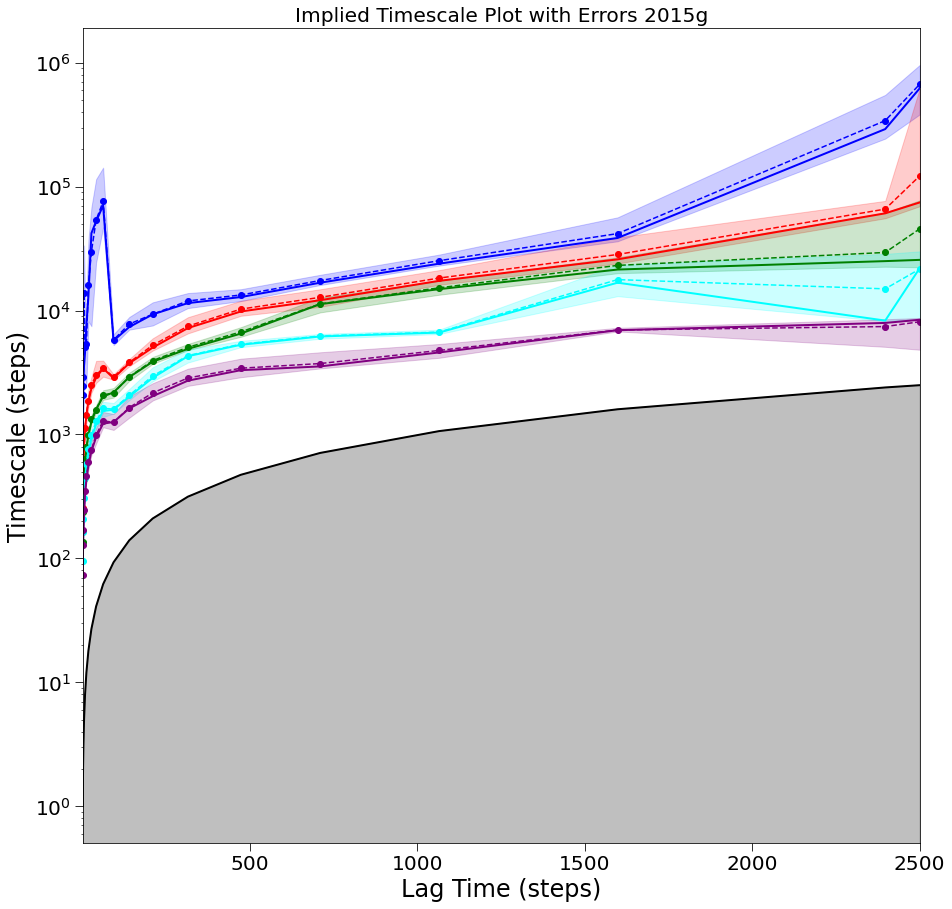

<Figure size 1080x1080 with 0 Axes>

In [17]:
#2009 glycosylated
its = msm.timescales_msm(dtrajs_2009g, lags=2500, nits=5, n_jobs=32, errors='bayes') #errors='bayes'
pplt.plot_implied_timescales(its, units='steps', nits=5, linewidth=2) #units can be ns if desired
plt.title('Implied Timescale Plot with Errors 2009g')
plt.xlabel('Lag Time (steps)', fontsize=24)
plt.ylabel('Timescale (steps)', fontsize=24)
plt.savefig('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/figures/its_msm_2009g.png', dpi=300)
plt.figure()

#2015 glycosylated
its = msm.timescales_msm(dtrajs_2015g, lags=2500, nits=5, n_jobs=32, errors='bayes') #errors='bayes'
pplt.plot_implied_timescales(its, units='steps', nits=5, linewidth=2) #units can be ns if desired
plt.title('Implied Timescale Plot with Errors 2015g')
plt.xlabel('Lag Time (steps)', fontsize=24)
plt.ylabel('Timescale (steps)', fontsize=24)
plt.savefig('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/figures/its_msm_2015g.png', dpi=300)
plt.figure()

It's important that the lag time used in the cell below (the MSM lag time) is equal to or larger than the TICA lag time (seen in the coor.tica cell much earlier - we selected a TICA lag time of 100 steps). TICA can only resolve motions longer than its lag time, because a motion shorter than the lag time is simply not seen. This is why it only makes sense to choose an MSM lag time that is equal to or larger than the TICA lag time. From all this, we will select an MSM lag time of 250 steps, which is the very start of where the lines flatten out. Now let's go ahead and create an MSM at the lag time we selected.

In [18]:
msm_2009g = msm.bayesian_markov_model(dtrajs_2009g, 250, reversible=True)
msm_2015g = msm.bayesian_markov_model(dtrajs_2015g, 250, reversible=True)

Now let's save the MSM data and reload it:

In [19]:
with open('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/msm_2009g.txt', 'wb') as fp:
    pickle.dump(msm_2009g, fp)
with open ('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/msm_2009g.txt', 'rb') as fp:
    msm_2009g = pickle.load(fp) 
with open('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/msm_2015g.txt', 'wb') as fp:
    pickle.dump(msm_2015g, fp)
with open ('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/msm_2015g.txt', 'rb') as fp:
    msm_2015g = pickle.load(fp) 

Each dot on this plot shows the timescale separation between one metastable state and the following metastable state. Thus the first dot shows the timescale separation between the first metastable state and the second metastable state, which corresponds to one slow motion. We want to pick all of the dots that are separated from each other, which is a qualitative task. If your selections don't generate interesting slow motions you can select more, but the dots with low separation (~1) represent the overlapping lines on the implied timescale plot, so they likely represent the same motion.

<Figure size 1080x1080 with 0 Axes>

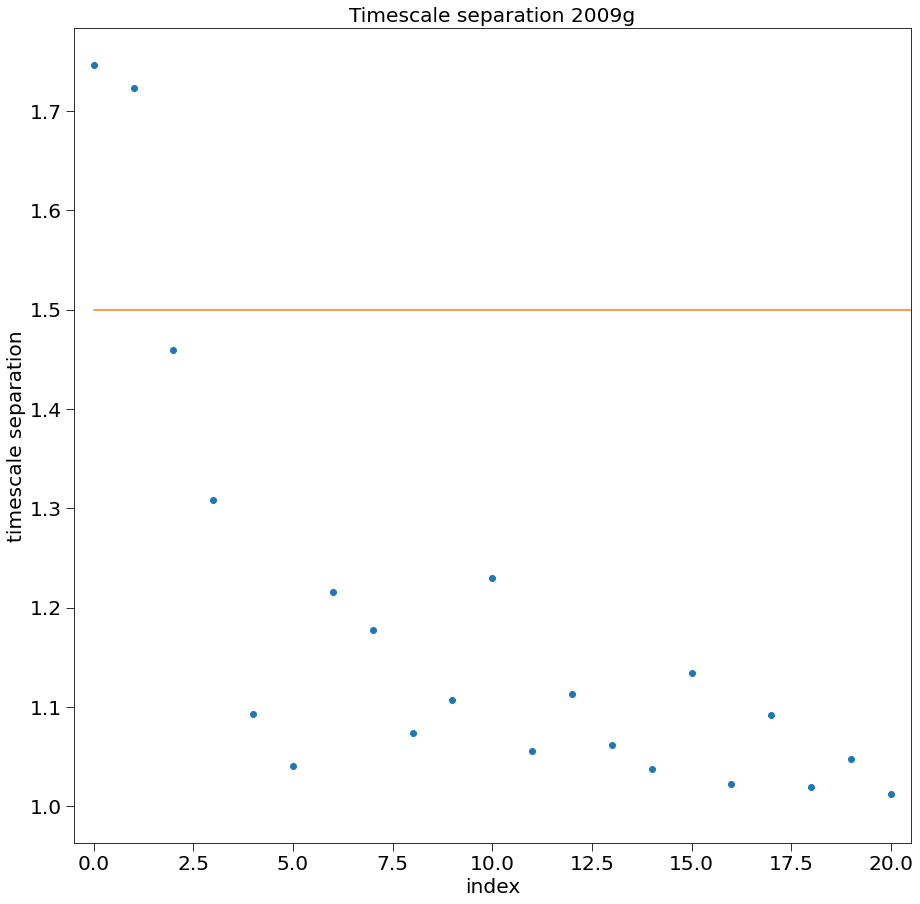

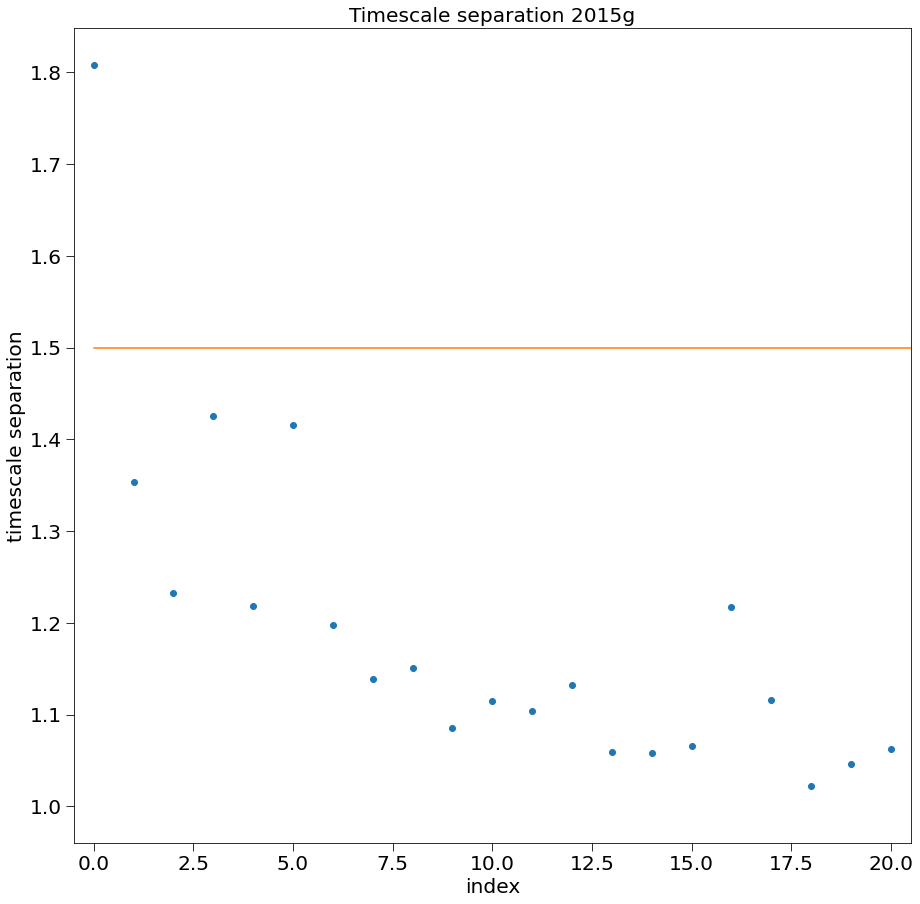

<Figure size 1080x1080 with 0 Axes>

In [20]:
#2009 glycosylated
plot(msm_2009g.timescales()[:-1]/msm_2009g.timescales()[1:], linewidth=0,marker='o')
plot(np.full(len(msm_2009g.timescales()[:-1]/msm_2009g.timescales()[1:]), 1.5))
plt.title('Timescale separation 2009g')
xlabel('index'); ylabel('timescale separation'); xlim(-0.5,20.5)
plt.figure()

#2015 glycosylated
plot(msm_2015g.timescales()[:-1]/msm_2015g.timescales()[1:], linewidth=0,marker='o')
plot(np.full(len(msm_2015g.timescales()[:-1]/msm_2015g.timescales()[1:]), 1.5))
plt.title('Timescale separation 2015g')
xlabel('index'); ylabel('timescale separation'); xlim(-0.5,20.5)
plt.figure()

For the 2015 dataset, dot with index 1 (the 2nd dot overall) is the last dot with a decent timescale separation (>1.5), so we would normally choose 2 dots on our first try. From iterating we know that we need to choose 2 dots to see our interesting slow motion. Choosing 2 dots means that we are choosing 4 metastable states, which correspond to 3 slow motions. This is a qualitative method to estimate how many states you should choose. A better method would be to examine the stationary distribution, which we will do later.

Now let's run the CK test on the two macrostates that we chose above This test estimates if you would still predict the same transition given an infinite lag time. We will run with 32 processors. Note: the mlags tells how long of a lag time to calculate. If the implied timescale plot shows the lines running into the forbidden region after lag time of 5, you would not want to choose an mlags greater than 5 here. If you get an error that says "index 297 is out of bounds for axis 0 with size 297" that means you need to select a smaller lag.

<Figure size 1080x1080 with 0 Axes>

<Figure size 3600x2700 with 0 Axes>

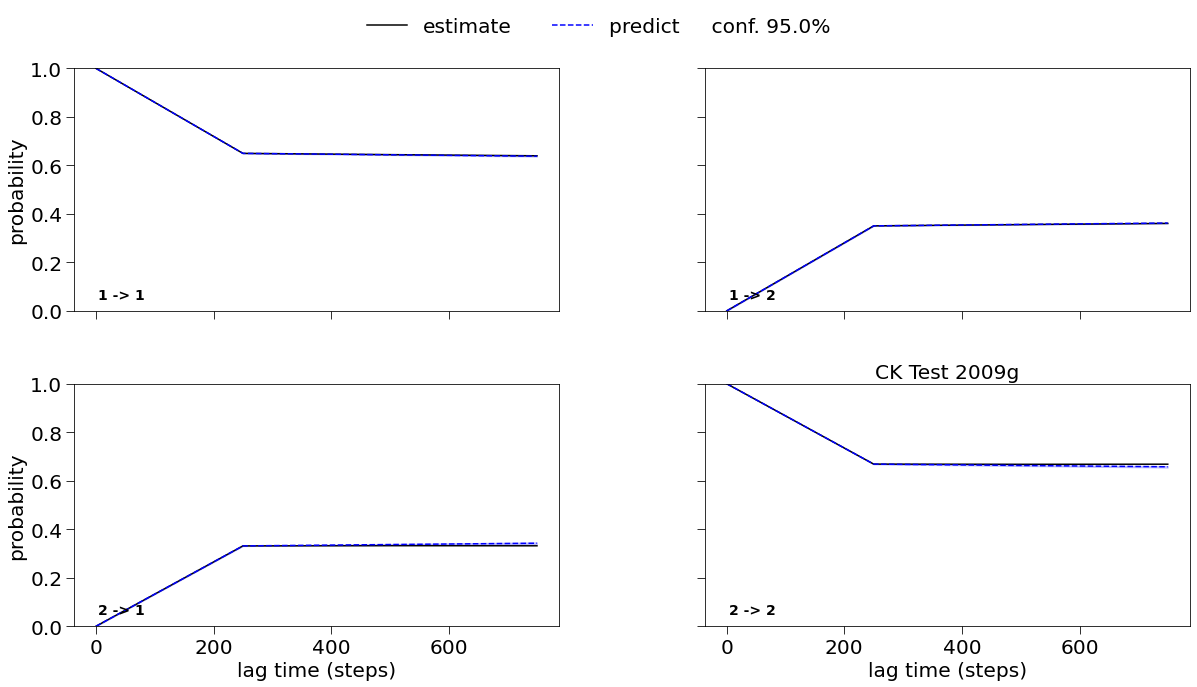

<Figure size 1080x1080 with 0 Axes>

<Figure size 3600x2700 with 0 Axes>

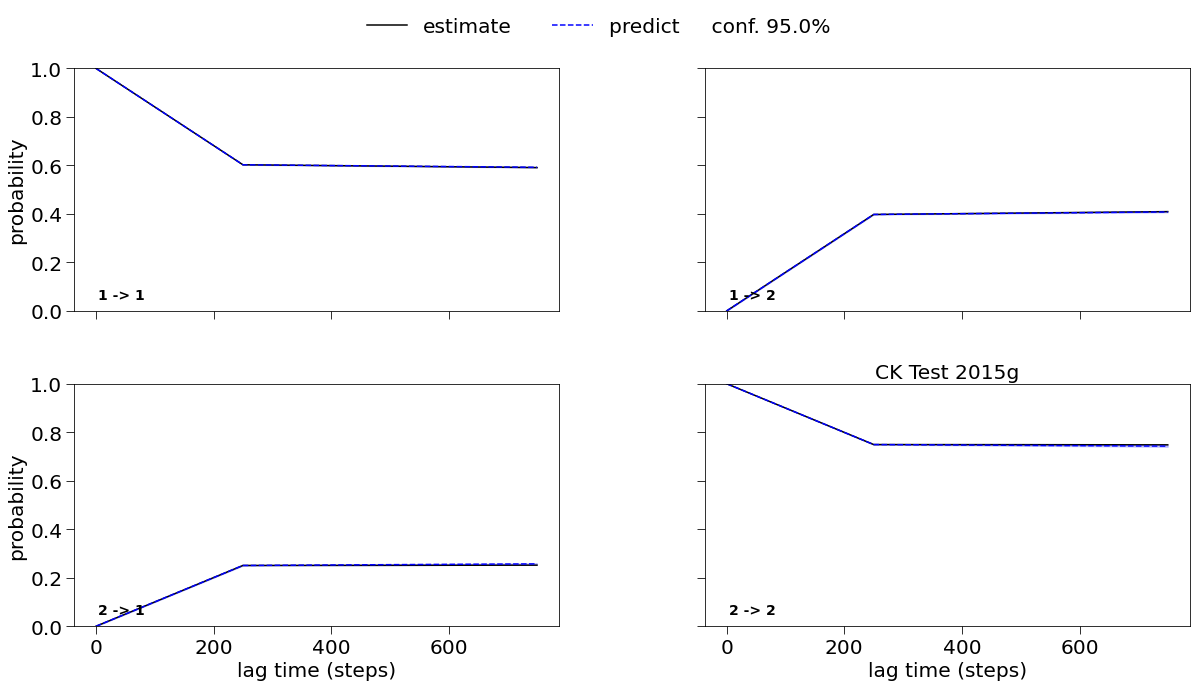

<Figure size 1080x1080 with 0 Axes>

In [21]:
#2009 glycosylated
ck_2009g = msm_2009g.cktest(2, memberships=None, mlags=4, conf=0.95, err_est=False, n_jobs=32, show_progress=True)
plt.figure(figsize=(12,9), dpi=300)
matplotlib.rcParams.update({'font.size': 14})
pplt.plot_cktest(ck_2009g, diag=False, figsize=(20,10), layout=(4,4), padding_top=0.1, y01=True, padding_between=0.3, dt=1.0, units='steps')
plt.title('CK Test 2009g')
plt.savefig('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/figures/ck_msm_2009g.png')
plt.figure()

#2015 glycosylated
ck_2015g = msm_2015g.cktest(2, memberships=None, mlags=4, conf=0.95, err_est=False, n_jobs=32, show_progress=True)
plt.figure(figsize=(12,9), dpi=300)
matplotlib.rcParams.update({'font.size': 14})
pplt.plot_cktest(ck_2015g, diag=False, figsize=(20,10), layout=(4,4), padding_top=0.1, y01=True, padding_between=0.3, dt=1.0, units='steps')
plt.title('CK Test 2015g')
plt.savefig('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/figures/ck_msm_2015g.png')
plt.figure()

We want the estimates to match the predictions (i.e. the lines to overlap). This needs to be the case for 3x the lag time that we have selected. Since we selected a lag time of 500 steps, this means the lines must overlap out to 1500 steps here. Thankfully this is the case!

We are now calculating the stationary distribution of the two macrostates that we selected earlier. Normally we would want each valid macrostate to have a population of above maybe 5-10% of all states, and we would iterate over the number of states selected until we find all the ones with a population above 5-10%. However, we have a huge amount of data that we are inputting, and we have iterated many times to get an idea of what reasonable mean first passage times and tilt angles should be. Here, states 1 are untilted and states 2 are tilted, for both 2009 and 2015 strains.

In [22]:
 #2009 glycosylated
nstates = 2
print("The 2009 glycosylated stationary distribution is:")
msm_2009g.pcca(nstates)
for i, s in enumerate(msm_2009g.metastable_sets):
    print('π_{} = {:f}'.format(i + 1, msm_2009g.pi[s].sum()))

#2015 glycosylated
nstates = 2
print("The 2015 glycosylated stationary distribution is:")
msm_2015g.pcca(nstates)
for i, s in enumerate(msm_2015g.metastable_sets):
    print('π_{} = {:f}'.format(i + 1, msm_2015g.pi[s].sum()))

The 2009 glycosylated stationary distribution is:
π_1 = 0.521171
π_2 = 0.478829
The 2015 glycosylated stationary distribution is:
π_1 = 0.479683
π_2 = 0.520317


Finally, let's determine how quickly our system exchanges between these states. Remember, a step is our lag time, and earlier we defined each step to take 0.06 ns. (0.06 ns/step). Thus we are converting this dataframe into ns (more humanly interpretable) by multiplying by 0.06. If you want this dataframe just in steps, simply remove the .multiply(0.06) part and it will print it out in steps.

In [45]:
nstates = 2
mfpt = np.zeros((nstates, nstates))
for i in range(nstates):
    for j in range(nstates):
        mfpt[i, j] = msm_2009g.mfpt(
            msm_2009g.metastable_sets[i],
            msm_2009g.metastable_sets[j])

from pandas import DataFrame
print('MFPT / ns:')
display(DataFrame(np.round(mfpt, decimals=2), index=range(0, nstates), columns=range(0, nstates)).multiply(0.06))


nstates = 2
mfpt = np.zeros((nstates, nstates))
for i in range(nstates):
    for j in range(nstates):
        mfpt[i, j] = msm_2015g.mfpt(
            msm_2015g.metastable_sets[i],
            msm_2015g.metastable_sets[j])

from pandas import DataFrame
print('MFPT / ns:')
display(DataFrame(np.round(mfpt, decimals=2), index=range(0, nstates), columns=range(0, nstates)).multiply(0.06))

MFPT / ns:


0         1
0    0.000  400.3956
1  438.585    0.0000

MFPT / ns:


0         1
0    0.0000  427.3386
1  838.0704    0.0000

The matrix above contain MFPTs between all transitions that originate in a "line" state and end in a "column" state. That means that you select the state on the left, and see which state it falls under. That is the mean first passage time from the row state to the column state. 

In [52]:
A = msm_2009g.metastable_sets[0]
B = np.concatenate(msm_2009g.metastable_sets[1:])
print('MFPT 1 -> other: ({:6.1f} ± {:5.1f}) ns'.format(
    0.06*msm_2009g.sample_mean('mfpt', A, B), 0.06*msm_2009g.sample_std('mfpt', A, B)))
print('MFPT other -> 1: ({:.1f} ± {:5.1f}) ns'.format(
    0.06*msm_2009g.sample_mean('mfpt', B, A), 0.06*msm_2009g.sample_std('mfpt', B, A)))

A = msm_2015g.metastable_sets[0]
B = np.concatenate(msm_2015g.metastable_sets[1:])
print('MFPT 1 -> other: ({:6.1f} ± {:5.1f}) ns'.format(
    0.06*msm_2015g.sample_mean('mfpt', A, B), 0.06*msm_2015g.sample_std('mfpt', A, B)))
print('MFPT other -> 1: ({:.1f} ± {:5.1f}) ns'.format(
    0.06*msm_2015g.sample_mean('mfpt', B, A), 0.06*msm_2015g.sample_std('mfpt', B, A)))

MFPT 1 -> other: ( 403.8 ±  16.1) ns
MFPT other -> 1: (438.8 ±  33.0) ns
MFPT 1 -> other: ( 429.5 ±  16.2) ns
MFPT other -> 1: (898.2 ± 111.0) ns


now let's save the MSMs and the clustering

In [49]:
with open('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/msm_2009g.txt', 'wb') as fp:
    pickle.dump(msm_2009g, fp)
with open('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/kmeans_clustering_2009g.pyemma', 'wb') as fp:
    pickle.dump(clk_2009g, fp)
with open('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/msm_2009g.pyemma', 'wb') as fp:
    pickle.dump(dtrajs_2009g, fp)
with open('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/msm_2015g.txt', 'wb') as fp:
    pickle.dump(msm_2015g, fp)
with open('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/kmeans_clustering_2015g.pyemma', 'wb') as fp:
    pickle.dump(clk_2015g, fp)
with open('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/msm_2015g.pyemma', 'wb') as fp:
    pickle.dump(dtrajs_2015g, fp) 

with open('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/msm_2009g.txt', 'rb') as fp:
    msm_2009g = pickle.load(fp)
with open('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/kmeans_clustering_2009g.pyemma', 'rb') as fp:
    clk_2009g = pickle.load(fp)
with open('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/msm_2009g.pyemma', 'rb') as fp:
    dtrajs_2009g = pickle.load(fp)
with open('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/msm_2015g.txt', 'rb') as fp:
    msm_2015g = pickle.load(fp)
with open('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/kmeans_clustering_2015g.pyemma', 'rb') as fp:
    clk_2015g = pickle.load(fp)
with open('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/msm_2015g.pyemma', 'rb') as fp:
    dtrajs_2015g = pickle.load(fp)

# Selecting structures

With our MSM constructed, we now want to select some structures from that MSM for visualization. How do we do that? By constructing our MSM, we are doing a form of clustering to put all the microstates into a small number of macrostates; for our model we chose two macrostates for each dataset. However, it is quite important to realize that assigning microstates to MSM macrostates is a "fuzzy" process, in the sense that each microstate receives a probability of being assigned to each macrostates - it is not a one-to-one assignment that one would intuitively think of. Some of these assignments are done with high confidence, meaning the microstate has a high probability of being assigned to a specific macrostate, and some are done woth lower confidence, meaning that the microstate doesn't have a particularly high probability of being assigned to any macrostate. Our probabilities fall on a continuum, so there isn't a clearly defined set of good, high probability structures. We will need to make this set ourselves, by defining a probabiliyt cutoff. We will do that in this section, and then visualize those high probability structures. If you need to, reload the data from the cell above before proceeding.

Here, we need to select microstates from our previously created macrostates. We select a membership cutoff, but we can change this if needed to make sure that we actually select some microstates - if we set the cutoff too high then no microstates will satisfy the cutoff and thus none will be created. However, we want it high to select structures that are representative of that macrostate and don't have assignments in other macrostates. For the clusters that pass the membership cutoff, we will randomly select frames from those clusters. Note, here we are creating pdb trajectories. These are very memory-inefficient, it would be much preferable to create GROMACS xtc trajectories and then create a single coordinatee gro file, or at least create dcd trajectories to go along with our pdb file. However, these other options did not produce a consistently visible output in visualization programs (likely because the coordinates were not aligned to the same space, and were still in the original space from when they were extracted from the virion, i.e. assembled in a sphere), leaving us with no choice but to use pdb trajectories.

In [50]:
#2009 glycosylated
inp_2009g = coor.source(trajs2, features=feat_tilt_2009g)
macrostates = 2

for N in range(0,macrostates):
    microstates = []
    
    ## Microstates belonging to macrostates N
    for i in msm_2009g.metastable_sets[N]:
        microstates.append(i)
    print('MACROSTATE ' +str(N))
    
    ## Check membership probability and select only clusters with membership above cutoff
    
    representative_microstates = []
    for cl in microstates:
        if msm_2009g.metastable_memberships[cl][N] > 0.9999999:   ## Specify the state membership cutoff you would like
            print('microstate = '+str(cl))
            print(msm_2009g.metastable_memberships[cl,:]) # Obtain metastable membership of microstate N
            print(msm_2009g.metastable_assignments[cl]) #Obtain macrostate assignment of microstate N
            print(str(len(clk_2009g.index_clusters[cl]))+'\n')  #Obtain number of frames in microstate N
            representative_microstates.append(cl)       
            
    #Pulling 10 representative frames from selected microstate cl
    for cl in representative_microstates:
        microstate_samples = msm_2009g.sample_by_state(10)
        # Give directory path of where structures should be saved
        coor.save_traj(inp_2009g, microstate_samples[cl], '/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/2009g_macrostate'+str(N)+'_microstate'+str(cl)+'.pdb')
        print(microstate_samples[cl])
        
                
#2015 glycosylated
inp_2015g = coor.source(trajs3, features=feat_tilt_2015g)
macrostates = 2

for N in range(0,macrostates):
    microstates = []
    
    ## Microstates belonging to macrostates N
    for i in msm_2015g.metastable_sets[N]:
        microstates.append(i)
    print('MACROSTATE ' +str(N))
    
    ## Check membership probability and select only clusters with membership above cutoff
    
    representative_microstates = []
    for cl in microstates: #get 0 and 1 at 0.99975
        if msm_2015g.metastable_memberships[cl][N] > 0.99999999:   ## Specify the state membership cutoff you would like
            print('microstate = '+str(cl))
            print(msm_2015g.metastable_memberships[cl,:]) # Obtain metastable membership of microstate N
            print(msm_2015g.metastable_assignments[cl]) #Obtain macrostate assignment of microstate N
            print(str(len(clk_2015g.index_clusters[cl]))+'\n')  #Obtain number of frames in microstate N
            representative_microstates.append(cl)       
            
    #Pulling 10 representative frames from selected microstate cl
    for cl in representative_microstates:
        microstate_samples = msm_2015g.sample_by_state(10)
        # Give directory path of where structures should be saved
        coor.save_traj(inp_2015g, microstate_samples[cl], '/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/2015g_macrostate'+str(N)+'_microstate'+str(cl)+'.pdb')
        print(microstate_samples[cl])

MACROSTATE 0
microstate = 190
[1.00000000e+00 3.69327364e-14]
0
87

07-10-22 15:53:45 pyemma.coordinates.api INFO     Created file /net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/2009g_macrostate0_microstate190.pdb
[[ 26   4]
 [  0 994]
 [ 26 117]
 [ 26 100]
 [ 26  29]
 [ 26  49]
 [ 26  35]
 [ 26  42]
 [ 26  35]
 [ 26  64]]
MACROSTATE 1
microstate = 240
[0. 1.]
1
104

07-10-22 15:53:48 pyemma.coordinates.api INFO     Created file /net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/2009g_macrostate1_microstate240.pdb
[[  27 5556]
 [  27 5671]
 [  27 5616]
 [  27 5555]
 [  27 5561]
 [  27 5681]
 [  27 5686]
 [  27 5900]
 [  27 5530]
 [  27 5665]]


MACROSTATE 0
microstate = 85
[1.00000000e+00 2.72282433e-14]
0
889

07-10-22 15:53:56 pyemma.coordinates.api INFO     Created file /net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/2015g_macrostate0_microstate85.pdb
[[   9 2969]
 [   9 2404]
 [   9 1554]
 [   9 2604]
 [   9 1828]
 [   9 1606]
 [   9 1714]
 [   9 1877]
 [   9 2536]
 [   9 2115]]
MACROSTATE 1
microstate = 60
[0. 1.]
1
792

07-10-22 15:53:59 pyemma.coordinates.api INFO     Created file /net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/msm/data/2015g_macrostate1_microstate60.pdb
[[  25 4239]
 [  25 6748]
 [  25 3699]
 [  25 4241]
 [  25 7007]
 [  25 4168]
 [  25 4995]
 [  25 3650]
 [  25 3982]
 [  25 6508]]


We get outputs from here in brackets, such as [596  140] and so on. What does this mean? It means that trajectory 596, frame 140 is contained in the cluster/macrostate associated with these numbers in the cell above. Remember, pyemma will not load your trajectories numerically, so you will need to see what trajectory #596 is with something like print(trajs1[596]). Caution, both the numbers in brackets and your trajs1 are python indexed and thus start at 0, not at 1.

In [51]:
print("The 2009 macrostate 0 comes from the",print(trajs2[492]), "trajectory file")
print("The 2009 macrostate 1 comes from the",print(trajs2[492]), "trajectory file")
print("The 2015 macrostate 0 comes from the",print(trajs2[492]), "trajectory file")
print("The 2015 macrostate 1 comes from the",print(trajs2[492]), "trajectory file")

IndexError: list index out of range

With a cutoff above, we get at least one microstate represented in each macrostate for all of our datasets. That's great! Let's see where on the free energy plot these selected microstates reside. To know what to put for the "selected_states = []" below, just find the macrostate in the results cell above and see what microstate(s) correspond to it. For example, in the 2009g dataset, we have "MACROSTATE 0 /// microstate = 78" so we will put 78 in the selected_states for 2009g macrostate 0 below. Alternatively, you could find the microstate numbers by looking at the filenames that you just created in the terminal. We will only select the macrostate with the highest probability to visualize here.

In [ ]:
#2009 glycosylated
fig, axes = pplt.plot_free_energy(tica_concatenated_2009g[:, 0], tica_concatenated_2009g[:, 1], nbins=50)
plt.xlabel('tICA component 1')
plt.ylabel('tICA component 2')
plt.title('tICA macrostates 2009g')
plt.scatter(clk_2009g.clustercenters[:,0], clk_2009g.clustercenters[:,1], color = 'black')
# state 0
selected_states = [78]
for cl in selected_states:
    plt.scatter(clk_2009g.clustercenters[cl,0], clk_2009g.clustercenters[cl,1], label='State 1', color = 'olivedrab')
# state 1
selected_states = [115]
for cl in selected_states:
    plt.scatter(clk_2009g.clustercenters[cl,0], clk_2009g.clustercenters[cl,1], label='State 2', color = 'thistle')

#2015 glycosylated
fig, axes = pplt.plot_free_energy(tica_concatenated_2015g[:, 0], tica_concatenated_2015g[:, 1], nbins=50)
plt.xlabel('tICA component 1')
plt.ylabel('tICA component 2')
plt.title('tICA macrostate 2015g')
plt.scatter(clk_2015g.clustercenters[:,0], clk_2015g.clustercenters[:,1], color = 'black')
# state 0
selected_states = [203]
for cl in selected_states:
    plt.scatter(clk_2015g.clustercenters[cl,0], clk_2015g.clustercenters[cl,1], label='State 1', color = 'olivedrab')
# state 1
selected_states = [253]
for cl in selected_states:
    plt.scatter(clk_2015g.clustercenters[cl,0], clk_2015g.clustercenters[cl,1], label='State 2', color = 'thistle')

These two datasets have a very similar tica state space. We are creating macrostates that span all of the TICA space, which is good. Our two macrostates that represent the MSM for each dataset are present here, and we can see where on the free energy diagram it lives, and what energy it has.